In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


In [ ]:
df = pd.read_csv('/content/insurance.csv')
print(df.shape)
print(df.columns)
print(df.head())


(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
# Encode sex and smoker using LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])        # male=1, female=0
df['smoker'] = le.fit_transform(df['smoker'])  # yes=1, no=0

# One-hot encode region
df = pd.get_dummies(df, columns=['region'], drop_first=True)


In [ ]:
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 4181.1944737536505
RMSE: 5796.2846592762735


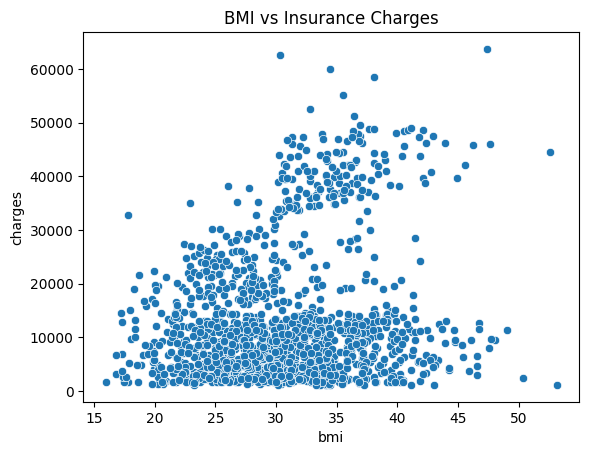

In [ ]:
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Insurance Charges')
plt.show()


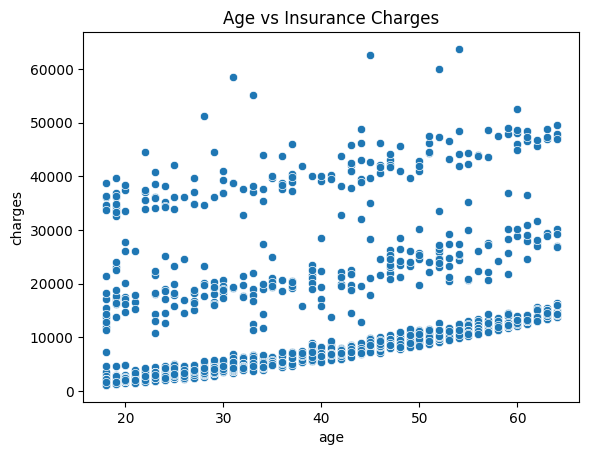

In [ ]:
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs Insurance Charges')
plt.show()


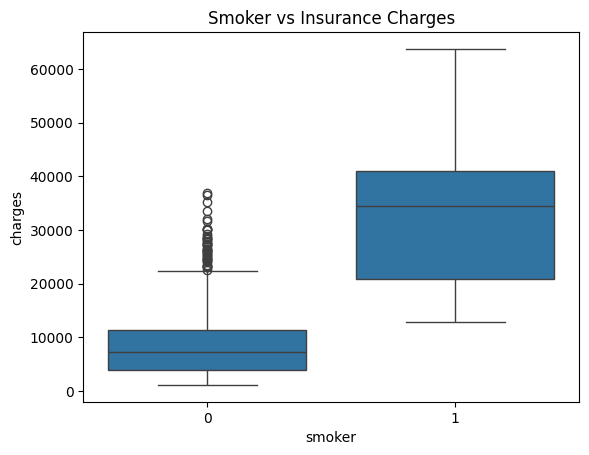

In [ ]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Insurance Charges')
plt.show()
